In [5]:
pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 10.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

問題３


In [18]:
# パラメータの設定
S0 = 100        # 初期株価
K = 100         # 行使価格
T = 1           # 満期（年数）
r = 0.01        # リスクフリーレート（無リスク金利）
sigma = 0.3     # ボラティリティ

# Black-Scholesの公式を計算する関数
def black_scholes_call(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# コールオプション価格の計算
call_price = black_scholes_call(S0, K, T, r, sigma)
print("ヨーロッパ型コールオプションの価格:", call_price)

ヨーロッパ型コールオプションの価格: 12.368267463784079


In [25]:
def d(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2

d1, d2 = d(S0, K, T, r, sigma)
print("d1:", d1)
print("d2:", d2)
print(norm.cdf(d1))
print(norm.cdf(d2))

print("e^(-0.01) =", np.exp(-0.01))


d1: 0.18333333333333335
d2: -0.11666666666666664
0.5727317593030405
0.45356210299507776
e^(-0.01) = 0.9900498337491681


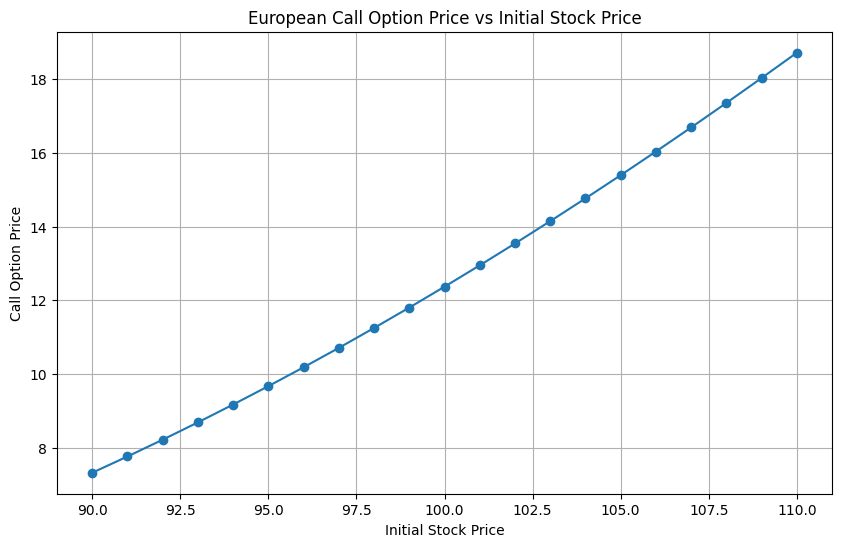

In [19]:
# 初期株価を90から110まで1刻みで変化
initial_prices = np.arange(90, 111, 1)
call_prices = [black_scholes_call(S0, K, T, r, sigma) for S0 in initial_prices]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(initial_prices, call_prices, marker='o')
plt.title("European Call Option Price vs Initial Stock Price")
plt.xlabel("Initial Stock Price")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()

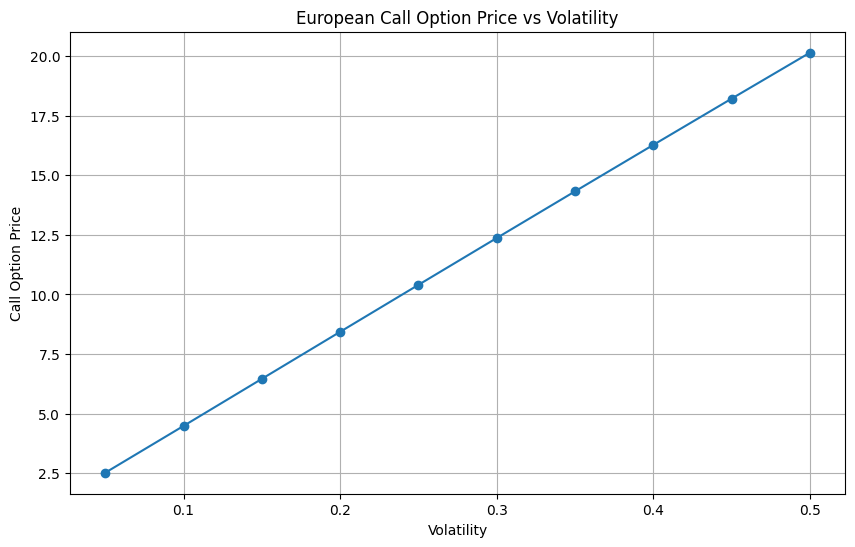

In [20]:
# ボラティリティを0.05から0.5まで0.05刻みで変化
volatilities = np.arange(0.05, 0.55, 0.05)
call_prices_volatility = [black_scholes_call(S0=100, K=K, T=T, r=r, sigma=sigma) for sigma in volatilities]

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.plot(volatilities, call_prices_volatility, marker='o')
plt.title("European Call Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Call Option Price")
plt.grid(True)
plt.show()


問題４

In [121]:
# Excel読み込み
file_path = 'nikkei225.xlsx'
nikkei_data = pd.read_excel(file_path, sheet_name='日経平均株価 IDX101000000', skiprows=10)

nikkei_data.head()

,日次(D),2022/10/12,2022/10/12.1,26396.83
0,日次(D),2022/10/13,2022/10/13,26237.42
1,日次(D),2022/10/14,2022/10/14,27090.76
2,日次(D),2022/10/17,2022/10/17,26775.79
3,日次(D),2022/10/18,2022/10/18,27156.14
4,日次(D),2022/10/19,2022/10/19,27257.38


(1) ダウンロードした日経平均株価データのグラフを描け

/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/2464081064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date1'] = pd.to_datetime(df['Date1'], errors='coerce')
/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/2464081064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


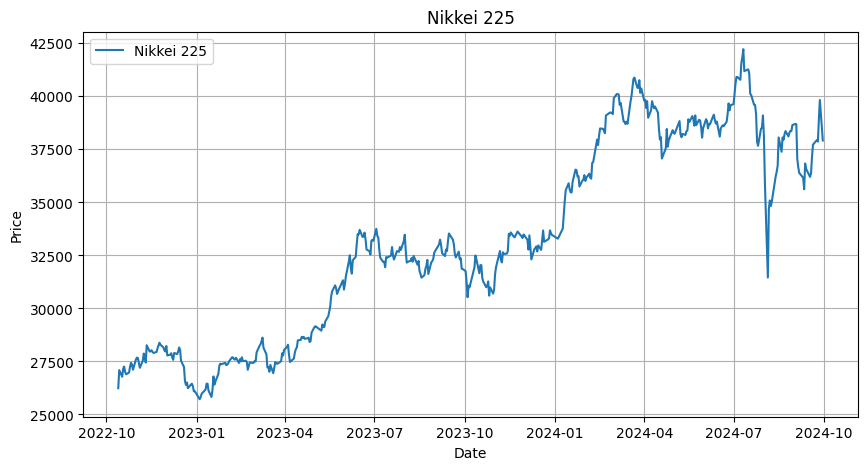

In [122]:
nikkei_data.columns = ['Type', 'Date1', 'Date2', 'Price']
df = nikkei_data[['Date1', 'Price']]

# datetime変換と数値型変換
df['Date1'] = pd.to_datetime(df['Date1'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

plt.figure(figsize=(10, 5))
plt.plot(df['Date1'], df['Price'], label='Nikkei 225')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Nikkei 225')
plt.legend()
plt.grid(True)
plt.show()


(2)　このオプションのペイオフはいくらか求めよ

In [123]:
K = 31857.62 # 行使価格
S_T = df['Price'].iloc[-1] # 満期時の株価
payoff = max(S_T - K, 0)

print(f'満期時の株価: {S_T:,.2f}円')
print(f'行使価格: {K:,.2f}円') 
print(f'ペイオフ: {payoff:,.2f}円')


満期時の株価: 37,919.55円
行使価格: 31,857.62円
ペイオフ: 6,061.93円


(3) 2022 年 9 月 30 日から 2023 年 9 月 29 日（計 247 個）の日経平均株価のデータを用い
て日次対数収益率を求め，グラフを作成せよ

/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/3428225193.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Log_Returns'] = np.log(filtered_data['Price'] / filtered_data['Price'].shift(1))


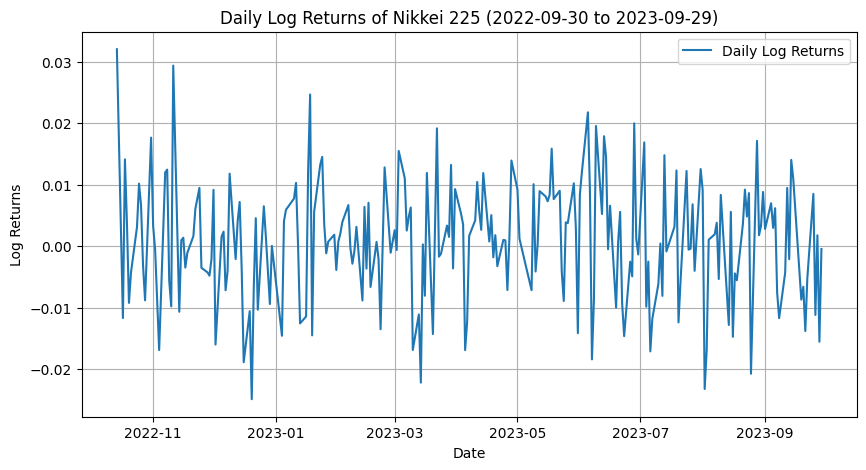

In [124]:
start_date = '2022-09-30'
end_date = '2023-09-29'
filtered_data = df[(df['Date1'] >= start_date) & (df['Date1'] <= end_date)]

# 日次対数収益率
filtered_data['Log_Returns'] = np.log(filtered_data['Price'] / filtered_data['Price'].shift(1))
filtered_data = filtered_data.dropna().reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(filtered_data['Date1'], filtered_data['Log_Returns'], label='Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Daily Log Returns of Nikkei 225 (2022-09-30 to 2023-09-29)')
plt.legend()
plt.grid(True)
plt.show()

(4) （３）で求めたデータの「平均× 247」したものを求めよ（年率の対数収益率）

In [125]:
# 平均
average_log_return = filtered_data['Log_Returns'].mean()

# 年率の対数収益率
annual_log_return = average_log_return * 247

print("年率の対数収益率:", annual_log_return)


年率の対数収益率: 0.20142950024622028


(5) （３）で求めたデータの「標準偏差× √247」したものを求めよ（年率のボラティリティ）

In [126]:
# 標準偏差
std_log_return = filtered_data['Log_Returns'].std()

# 年率のボラティリティ
sigma = std_log_return * np.sqrt(247)

print("年率のボラティリティ:", sigma)

年率のボラティリティ: 0.15263010665364898


(6) Black-Scholes の公式を用いてオプション価格を求めよ．ただし，金利は年率 0.5% とすること

In [155]:
K = 31857.62
T = 1
r = 0.005
dT = 1/243

In [159]:
df1 = df.loc[df['Date1'] >= '2023-10-02']
df1 = df1.reset_index(drop=True)
df1['time'] = [i/243 for i in range(len(df1))]
df1['A(t)'] = 0
df1['A(t)'][0] = 1
for i in range(1, len(df1)):
    df1.loc[i, 'A(t)'] = df1.loc[i-1, 'A(t)'] + r * df1.loc[i-1, 'A(t)'] * dT
df1

/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/3097078600.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['A(t)'][0] = 1
/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/3097078600.py:5: SettingWithC

,Date1,Price,time,A(t)
0,2023-10-02,31759.88,0.000000,1.000000
1,2023-10-03,31237.94,0.004115,1.000021
2,2023-10-04,30526.88,0.008230,1.000041
3,2023-10-05,31075.36,0.012346,1.000062
4,2023-10-06,30994.67,0.016461,1.000082
...,...,...,...,...
239,2024-09-24,37940.59,0.983539,1.004930
240,2024-09-25,37870.26,0.987654,1.004950
241,2024-09-26,38925.63,0.991770,1.004971
242,2024-09-27,39829.56,0.995885,1.004992


In [202]:
# オプション価格計算
def BScall(S, K, tau, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)
    return call_price

# 残存期間tau
df1['tau'] = T - df1['time']

df1['call_price'] = BScall(df1['Price'], K, df1['tau'], r, sigma)

# 最終行のcall_priceをペイオフに変更
S_T = df1['Price'].iloc[-1]
payoff = max(S_T - K, 0)
df1.loc[df1.index[-1], 'call_price'] = payoff

print("コールオプション価格:\n", df1['call_price'])


コールオプション価格:
 0      1960.871631
1      1688.460072
2      1355.904835
3      1601.231450
4      1558.778050
          ...     
239    6085.591918
240    6014.606459
241    7069.320986
242    7972.595500
243    6061.930000
Name: call_price, Length: 244, dtype: float64


(7) 2023 年 10 月 2 日から 2024 年 9 月 30 日の日経平均株価に対してデルタヘッジを行ったときのヘッジポートフォリオの価値のグラフを作成せよ

In [203]:
def alpha(S, K, tau, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1)

def beta(S, K, tau, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return norm.cdf(d2)

In [204]:
df1['W(t)'] = 0
df1['alpha(t)'] = 0
df1['beta(t)'] = 0

df1['alpha(t)'] = alpha(df1['Price'], K, df1['tau'], r, sigma)
df1['beta(t)'] = beta(df1['Price'], K, df1['tau'], r, sigma)

# 初期値設定
df1.loc[0, 'W(t)'] = df1.loc[0, 'call_price']

# W(t)計算
for i in range(1, len(df1)):
    df1.loc[i, 'W(t)'] = df1.loc[i-1, 'W(t)'] + \
                         df1.loc[i-1, 'alpha(t)'] * (df1.loc[i, 'Price'] - df1.loc[i-1, 'Price']) + \
                         df1.loc[i-1, 'beta(t)'] * (df1.loc[i, 'A(t)'] - df1.loc[i-1, 'A(t)'])
    
df1

/var/folders/m5/qjbw9mwx66n97zmrlsfzns380000gn/T/ipykernel_25028/2585206906.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1960.871631224034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df1.loc[0, 'W(t)'] = df1.loc[0, 'call_price']


,Date1,Price,time,A(t),call_price,W(t),alpha(t),beta(t),tau
0,2023-10-02,31759.88,0.000000,1.000000,1960.871631,1960.871631,0.535436,0.474609,1.000000
1,2023-10-03,31237.94,0.004115,1.000021,1688.460072,1681.406168,0.491976,0.431550,0.995885
2,2023-10-04,30526.88,0.008230,1.000041,1355.904835,1331.581709,0.431683,0.372934,0.991770
3,2023-10-05,31075.36,0.012346,1.000062,1601.231450,1568.351083,0.477869,0.417932,0.987654
4,2023-10-06,30994.67,0.016461,1.000082,1558.778050,1529.791844,0.470804,0.411139,0.983539
...,...,...,...,...,...,...,...,...,...
239,2024-09-24,37940.59,0.983539,1.004930,6085.591918,4230.487560,1.000000,1.000000,0.016461
240,2024-09-25,37870.26,0.987654,1.004950,6014.606459,4160.157580,1.000000,1.000000,0.012346
241,2024-09-26,38925.63,0.991770,1.004971,7069.320986,5215.527601,1.000000,1.000000,0.008230
242,2024-09-27,39829.56,0.995885,1.004992,7972.595500,6119.457622,1.000000,1.000000,0.004115


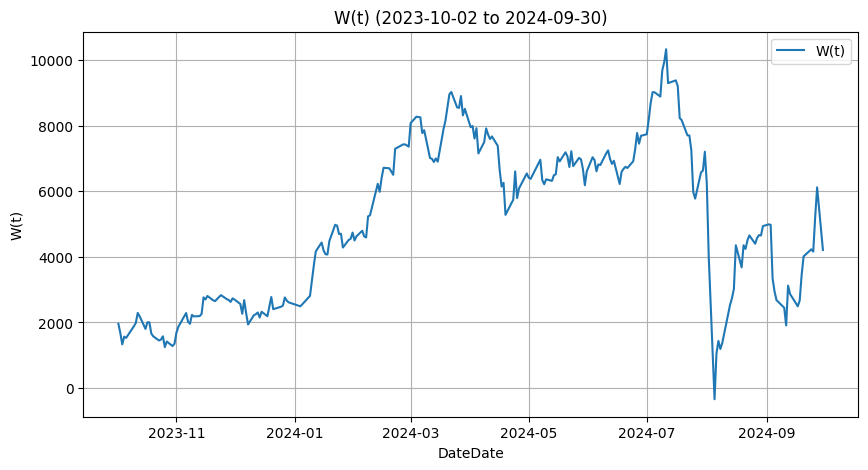

In [205]:
# W(t)のグラフをプロット
plt.figure(figsize=(10, 5))
plt.plot(df1['Date1'], df1['W(t)'], label='W(t)')
plt.xlabel('DateDate')
plt.ylabel('W(t)')
plt.title('W(t) (2023-10-02 to 2024-09-30)')
plt.grid(True)
plt.legend()
plt.show()


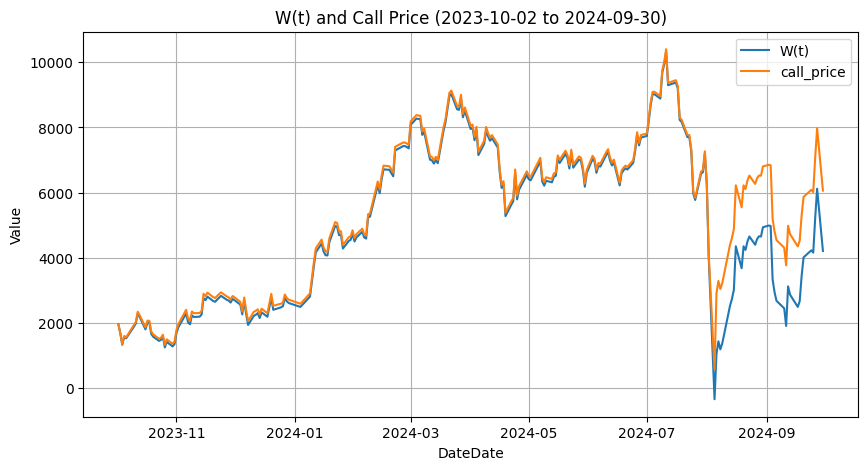

In [206]:
# W(t)とcall_priceのグラフをプロット
plt.figure(figsize=(10, 5))
plt.plot(df1['Date1'], df1['W(t)'], label='W(t)')
plt.plot(df1['Date1'], df1['call_price'], label='call_price')
plt.xlabel('DateDate')
plt.ylabel('Value')
plt.title('W(t) and Call Price (2023-10-02 to 2024-09-30)')
plt.grid(True)
plt.legend()
plt.show()

In [207]:
# 満期におけるヘッジ誤差
error = df1.iloc[-1]['call_price'] - df1.iloc[-1]['W(t)']
print(f"満期におけるヘッジ誤差: {error}")


満期におけるヘッジ誤差: 1852.4823577150564
